In [20]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import pandas as pd
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import seaborn as sns

#  Import and read our cleaned data.
import pandas as pd
url = "https://raw.githubusercontent.com/natbiorg/project_4/refs/heads/main/analysis_and_resources/Resources/cleaned.csv"
data_df = pd.read_csv(url)
data_df.head()


,Customer_ID,Gender,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Average_Price,...,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_Percentage,Near_Holiday,State,Total_Sales,Total_Cost,Average_Saved($)
0,17850.0,M,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
1,17850.0,M,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
2,17850.0,M,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest Smart Devices,2.0,122.77,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,245.54,227.486,12.277
3,17850.0,M,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest Smart Devices,1.0,81.50,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,81.50,79.850,8.150
4,17850.0,M,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371


In [21]:
data_df.columns

Index(['Customer_ID', 'Gender', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Average_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Offline_Spend', 'Online_Spend', 'Month',
       'Coupon_Code', 'Discount_Percentage', 'Near_Holiday', 'State',
       'Total_Sales', 'Total_Cost', 'Average_Saved($)'],
      dtype='object')

In [22]:
data_df.nunique()

,0
Customer_ID,1469
Gender,2
Tenure_Months,50
Transaction_ID,25062
Transaction_Date,365
Product_SKU,1145
Product_Description,404
Product_Category,13
Quantity,152
Average_Price,547


In [23]:
data_df = data_df.drop(['Customer_ID', 'Transaction_ID', 'Product_SKU', 'Product_Description', 'Coupon_Code'], axis=1)

In [24]:
data_df['Transaction_Date'] = pd.to_datetime(data_df['Transaction_Date'])
data_df['Transaction_Date_Ordinal'] = data_df['Transaction_Date'].apply(lambda date: date.toordinal())
data_df.drop(['Transaction_Date'], axis=1, inplace=True)

In [25]:
# data_df.dtypes
# # To dummy Gender, Product_Category, Coupon_Status, Near_Holiday, State
# # Convert Transaction Date to date type

In [26]:
# data_df.dtypes

In [27]:
# cost_by_date = data_df.groupby('Transaction_Date_Ordinal')['Total_Cost'].sum()
# cost_by_date.head()

In [28]:
# cost_by_date.plot(kind='line', figsize=(8, 4), title='Total_Cost')
# plt.gca().spines[['top', 'right']].set_visible(False)

In [29]:
data_cat =  data_df.dtypes[data_df.dtypes == "object"].index.tolist()
enc = OneHotEncoder(sparse_output=False)

encode_df = pd.DataFrame(enc.fit_transform(data_df[data_cat]))

encode_df.columns = enc.get_feature_names_out()

data_df = data_df.merge(encode_df,left_index=True, right_index=True)
data_df = data_df.drop(data_cat, axis=1)
data_df.head()

# TODO Change Near Holiday to  a Binary?

,Tenure_Months,Quantity,Average_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_Percentage,Total_Sales,...,Near_Holiday_New Year's Day,Near_Holiday_Thanksgiving Day,Near_Holiday_Veterans Day,Near_Holiday_Washington's Birthday,Near_Holiday_nan,State_California,State_Illinois,State_New Jersey,State_New York,State_Washington DC
0,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12.0,2.0,122.77,6.5,0.1,4500.0,2424.5,1,10.0,245.54,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12.0,1.0,81.50,6.5,0.1,4500.0,2424.5,1,10.0,81.50,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
data_df.dtypes

,0
Tenure_Months,float64
Quantity,float64
Average_Price,float64
Delivery_Charges,float64
GST,float64
Offline_Spend,float64
Online_Spend,float64
Month,int64
Discount_Percentage,float64
Total_Sales,float64


In [31]:
# Dummied Gender, Product_Category, Coupon_Status, Near_Holiday, State - drop 1 of each cat

data_df = data_df.drop(['State_New Jersey', 'Near_Holiday_Columbus Day', 'Coupon_Status_Clicked', 'Gender_F', 'Product_Category_Stationery'], axis=1, inplace=False)
data_df.head()

,Tenure_Months,Quantity,Average_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_Percentage,Total_Sales,...,Near_Holiday_Memorial Day,Near_Holiday_New Year's Day,Near_Holiday_Thanksgiving Day,Near_Holiday_Veterans Day,Near_Holiday_Washington's Birthday,Near_Holiday_nan,State_California,State_Illinois,State_New York,State_Washington DC
0,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.0,2.0,122.77,6.5,0.1,4500.0,2424.5,1,10.0,245.54,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12.0,1.0,81.50,6.5,0.1,4500.0,2424.5,1,10.0,81.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='Total_Cost', ylabel='Count'>

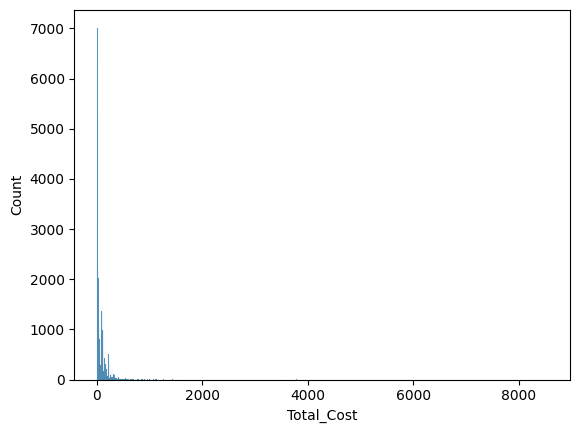

In [32]:
sns.histplot(data = data_df, x='Total_Cost')

In [33]:
y = data_df['Total_Cost']
X = data_df.drop(['Total_Cost'], axis =1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [34]:
# Outlier controls
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Apply outlier removal to y_train
y_train = pd.DataFrame(y_train, columns=['Total_Cost'])
y_train = remove_outliers_iqr(y_train, 'Total_Cost')
y_train = y_train['Total_Cost']

# Now filter X_train based on the final indices of y_train
X_train = X_train.loc[y_train.index]


In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Create a random forest regressor
rf_model = RandomForestRegressor(n_estimators=800, max_depth = 500, random_state=78)
# rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(x_train, y_train)

In [18]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions
predictions = rf_model.predict(X_test_scaled)

In [19]:
# Evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}. MAE: {mae}. R-squared: {r2}. ")

MSE: 10802.793593136857. MAE: 9.936662184069693. R-squared: 0.4474867257956403. 
